<a href="https://colab.research.google.com/github/chi-hun/chi-hun/blob/main/albumentations.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import albumentations as A
import cv2
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
image = cv2.imread('/content/gettyimages-1251667609-580x418.jpg')

In [ ]:
image2 = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

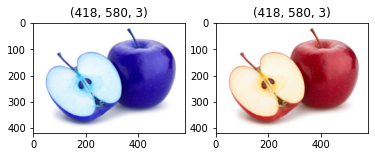

In [ ]:
plt.subplot(1,2,1)
plt.imshow(image)
plt.title(image.shape)
plt.subplot(1,2,2)
plt.imshow(image2)
plt.title(image2.shape)
plt.show()

In [ ]:
image_o = image2

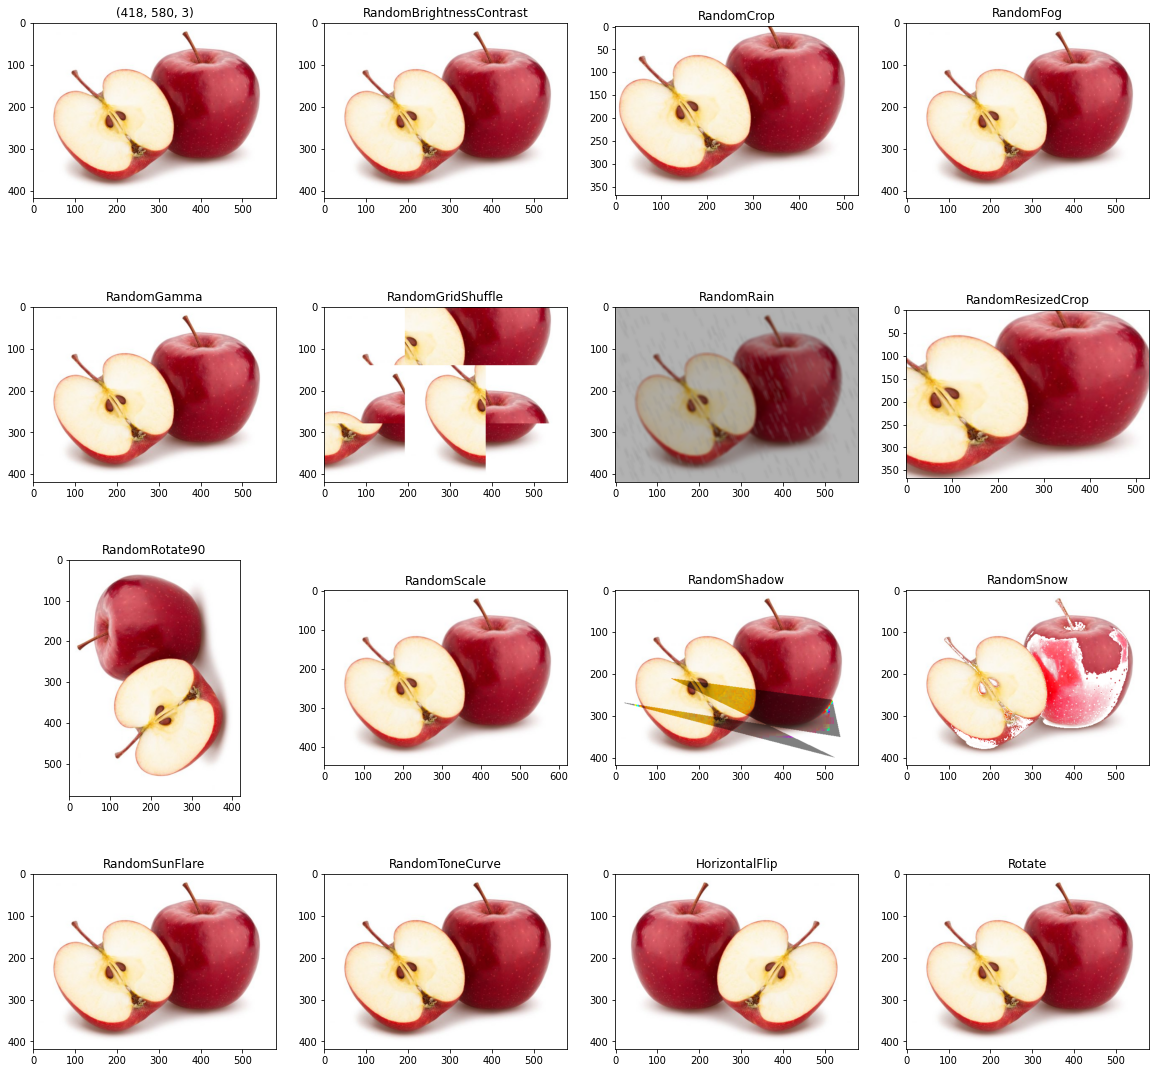

In [ ]:
transformer = A.Compose([A.RandomBrightnessContrast(),
                         A.RandomCrop(image.shape[0]-50,image.shape[1]-50),
                         A.RandomFog(True),
                         A.RandomGamma(),
                         A.RandomGridShuffle(),
                         A.RandomRain(True),
                         A.RandomResizedCrop(image.shape[0]-50,image.shape[1]-50),
                         A.RandomRotate90(True),
                         A.RandomScale(),
                         A.RandomShadow(),
                         A.RandomSnow(),
                         A.RandomSunFlare(),
                         A.RandomToneCurve(),
                         A.HorizontalFlip(True),
                         A.Rotate(20)])
plt.figure(figsize=(20,20))
for i in range(16):
    if i == 0:
        plt.subplot(4,4,i+1)
        plt.imshow(image_o)
        plt.title(image_o.shape)
    else:
        plt.subplot(4,4,i+1)
        plt.imshow(transformer[i-1](image=image_o)['image'])
        plt.title(transformer[i-1].__class__.__name__)
plt.show()

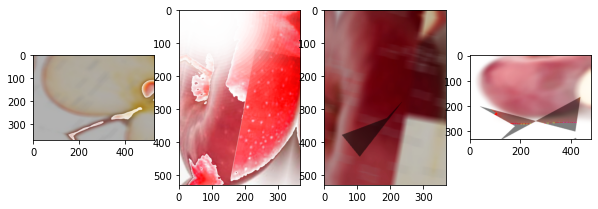

In [ ]:
plt.figure(figsize=(10,10))
for i in range(4):
    plt.subplot(1,4,i+1)
    plt.imshow(transformer(image=image_o)['image'])
plt.show()

# 텐서플로우

In [108]:
import tensorflow as tf
from sklearn.datasets import load_sample_image
from functools import partial
image = load_sample_image('china.jpg')
image = image.reshape(1,427,640,3)
label = tf.constant(['china'])
data = tf.data.Dataset.from_tensor_slices((image, label))

In [54]:
transformer = A.Compose([A.RandomBrightnessContrast(),
                         A.RandomFog(True),
                         A.RandomGamma(),
                         A.RandomGridShuffle(),
                         A.RandomRain(True),
                         A.RandomRotate90(True),
                         A.RandomScale(),
                         A.RandomShadow(),
                         A.RandomSnow(),
                         A.RandomSunFlare(),
                         A.RandomToneCurve(),
                         A.HorizontalFlip(True),
                         A.Rotate(20)])

이미지augument + 이미지 resize

In [123]:
def aug_image(image, image_size): #이미지 변환
    image_dic = {'image':image}
    aug_img = transformer(**image_dic)
    aug_img = tf.cast(aug_img['image']/255, tf.float32)
    aug_img = tf.image.resize(aug_img, size=[image_size, image_size])
    return aug_img

def process_data(image, label, image_size): #텐서플로우 계산으로 aug_image 
    aug_img = tf.numpy_function(func=aug_image, inp=[image, image_size], Tout=tf.float32)
    return aug_img, label

In [124]:
dataset = data.map(partial(process_data, image_size=120)) #partial image_size 전달

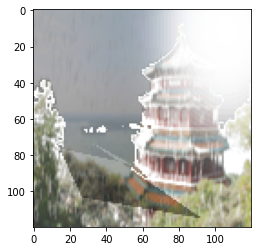

In [131]:
plt.imshow(next(iter(dataset))[0])
plt.show()

이미지augument

In [114]:
def aug_image(image): #이미지 변환
    image_dic = {'image':image}
    aug_img = transformer(**image_dic)
    aug_img = tf.cast(aug_img['image']/255, tf.float32)
    return aug_img

def process_data(image, label): #텐서플로우 계산으로 aug_image 
    aug_img = tf.numpy_function(func=aug_image, inp=[image], Tout=tf.float32)
    return aug_img, label

In [115]:
dataset = data.map(process_data)

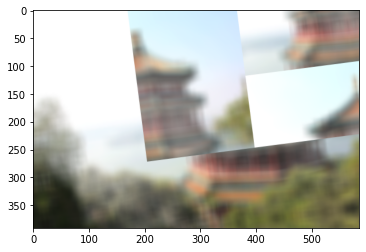

In [122]:
plt.imshow(next(iter(dataset))[0])
plt.show()